## Demonstration of scNiche on the simulated data

In this tutorial, the simulated dataset was generated from the [multi-condition human PBMCs scRNA-seq datasets (*Nat Biotechnol., 2018*)](https://www.nature.com/articles/nbt.4042) following the simulation framework used in [scCube (*Nat Commun., 2024*)](https://github.com/ZJUFanLab/scCube).
The simulated cell niches were designated to exhibit heterogeneity in either gene expression or cellular composition. Details of the relevant simulations can be found in our manuscript.

In [1]:
import scniche as sn
import scanpy as sc
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Last run with scNiche version:", sn.__version__)

# set seed
sn.pp.set_seed()

/slurm/home/yrd/fanlab/qianjingyang/.conda/envs/test/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Last run with scNiche version: 1.0.0


[<AxesSubplot: title={'center': 'Cell_type'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot: title={'center': 'Niche'}, xlabel='spatial1', ylabel='spatial2'>]

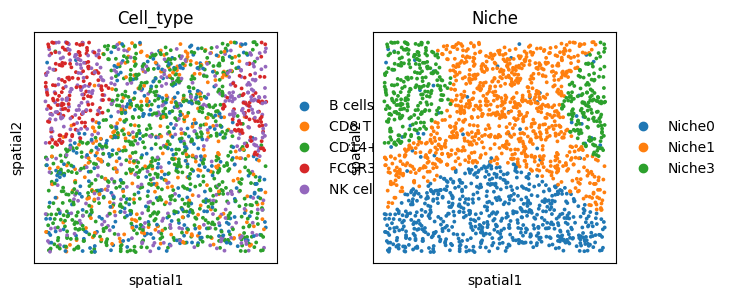

In [2]:
# load data
adata = sn.datasets.simulated_data()

plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(adata, basis="spatial", color=['Cell_type', 'Niche', ],s=30, show=False, )

In [3]:
cutoff = 20
lr = 0.01
epochs = 100

# prepare
adata = sn.pp.cal_spatial_neighbors(adata=adata, celltype_key='Cell_type', mode='KNN', k_cutoff=cutoff, verbose=False)
adata = sn.pp.cal_spatial_exp(adata=adata, mode='KNN', k_cutoff=cutoff, is_pca=True, n_comps=50, verbose=False)
adata = sn.pp.prepare_data(adata=adata, verbose=False)
                
# training
model = sn.tr.Runner(adata=adata, device='cuda:0', verbose=False)
adata = model.fit(lr=lr, epochs=epochs)
                
# clustering
target_num = len(set(adata.obs['Niche']))
adata = sn.tr.clustering(adata=adata, target_k=target_num)

Train Epoch: 100: 100%|██████████| 100/100 [00:08<00:00, 11.18it/s, loss=22.3043]


[<AxesSubplot: title={'center': 'Cell_type'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot: title={'center': 'Niche'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot: title={'center': 'scNiche'}, xlabel='spatial1', ylabel='spatial2'>]

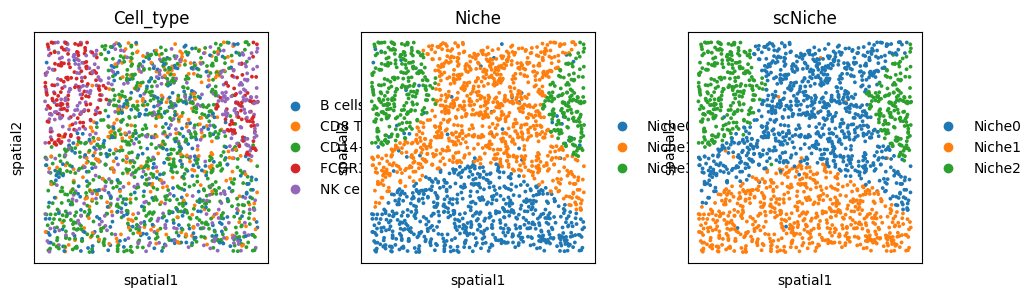

In [4]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(adata, basis="spatial", color=['Cell_type', 'Niche', 'scNiche', ],s=30, show=False, )

In [5]:
adjusted_rand_score(adata.obs['Niche'], adata.obs['scNiche'])

0.9033454418000373